In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [4]:
pd.__version__

'1.4.2'

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [6]:
!pip install pyarrow

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [8]:
import sklearn

In [9]:
sklearn.__version__

'1.0.2'

In [10]:
f'There are {len(df.columns)} columns in the January data'

'There are 19 columns in the January data'

In [11]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [12]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [13]:
df['duration'] = df.duration.apply(lambda td : td.total_seconds()/60)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

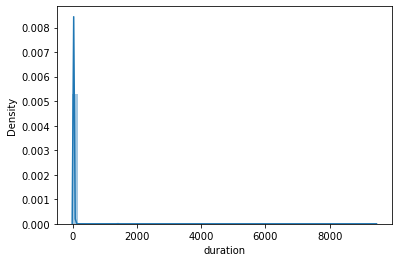

In [14]:
sns.distplot(df.duration)

In [15]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
50%      1.163333e+01
95%      3.793333e+01
98%      5.100000e+01
99%      6.045000e+01
max      9.455400e+03
Name: duration, dtype: float64

In [16]:
((df.duration>=1) & (df.duration<=60)).mean()

0.9778326020432945

In [17]:
filter_ = ((df.duration>=1) & (df.duration<=60))         

print(f'After dropping outliers from duration you can see that the fraction of outliers is: \
      {df[filter_].shape[0]/df.shape[0]}')

After dropping outliers from duration you can see that the fraction of outliers is:       0.9778326020432945


In [18]:
# removing outliers from df
df = df[filter_]

In [19]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [20]:
df[categorical] = df[categorical].astype(str)

In [21]:
df[categorical + numerical] 

,PULocationID,DOLocationID,trip_distance
0,186,79,1.72
1,140,236,1.80
2,236,79,4.70
3,79,211,1.40
4,211,148,0.80
...,...,...,...
2964619,107,263,3.18
2964620,114,236,4.00
2964621,211,25,3.33
2964622,107,13,3.06


In [22]:
df['duration'].describe()

count    2.898906e+06
mean     1.441373e+01
std      1.015959e+01
min      1.000000e+00
25%      7.250000e+00
50%      1.165000e+01
75%      1.848333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [23]:
dv = DictVectorizer()

In [24]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [25]:
X_train = dv.fit_transform(train_dicts)

In [26]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [27]:
print(f'The dimensionality of the categorical feature matrix is {len(dv.feature_names_)-1}')

The dimensionality of the categorical feature matrix is 518


In [28]:
target = 'duration'
y_train = df[target].values

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

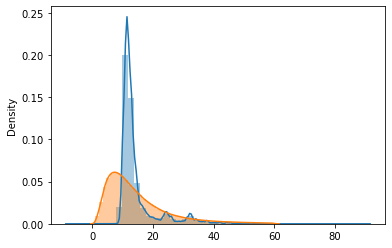

In [31]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

In [32]:
mean_squared_error(y_train, y_pred, squared=False)

7.9460168727647265

In [33]:
# If we want to be able to test and train with ease we should standardize the transaformation process

def transform_data(filename):
    
    df = pd.read_parquet(filename)
    
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    
    df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
    df['duration'] = df.duration.apply(lambda td : td.total_seconds()/60)
    
    filter_ = ((df.duration>=1) & (df.duration<=60))         
    df = df[filter_]
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [34]:
df_val = transform_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')

In [35]:
df_val.shape

(2938060, 20)

In [36]:
# We just need to do transform here, not fit because we have already done that with the training set
# and we want the same number of features

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [38]:
y_val = df_val['duration']

In [37]:
y_val_pred = lr.predict(X_val)

In [39]:
mean_squared_error(y_val, y_val_pred, squared=False)

8.12319291087713